# RetailMart Product Sales Prediction

DESCRIPTION

The data scientist at RetailMart have collected sales data for one thousand five hundred and fifty nine products across ten
stores in different cities. Furthermore certain attributes of each product and store have been defined. The aim is to build a predictive model and find the sales figures of each product at a particular store.

***

In [1]:
# For data handling and wrangling

import pandas as pd
import numpy as np
import math

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

# For model building, evaluation, selection and fine-tuning
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline


import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import re # For regular expressions

### STEP 1: Load the datasets into Python Environment

In [2]:
# Loading datasets

train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")
print("\nThe train dataset has {} rows and {} columns.".format(train.shape[0],train.shape[1]))
print("\nThe test dataset has {} rows and {} columns.".format(test.shape[0],test.shape[1]))


The train dataset has 8523 rows and 12 columns.

The test dataset has 5681 rows and 11 columns.


In [3]:
# Check the column names

print("\nThe train dataset has following columns:")
print(train.columns)
print("\nThe test dataset has following columns:")
print(test.columns)


The train dataset has following columns:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

The test dataset has following columns:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Train dataset contains the target/response variable 'Item_Outlet_Sales'. It is not present in the test dataset.

In [4]:
# Modifying Jupyter Notebook Kernel to display output of all code lines in one go.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
# To better understand the data, look at few rows from both dataframes.
print('Train Dataframe')
train.head()
print("\n")
print('Test Dataframe')
test.head()

Train Dataframe


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052




Test Dataframe


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### STEP 2 - Perform Exploratory Data Analysis (EDA)

In [6]:
# Exploring the categorical features together

categorical_vars = train.select_dtypes(include='object')
categorical_vars

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
categorical_vars.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

"Item_Identifier" has a large number of unique values and hence not apt for OneHotEncoding (OHE)/ OrdinalEncoding (OE).
"Item_Type" too has 16 unique values. We need to explore these further. Might not be apt for OHE/ OE.
Outlet_Identifier has 10 values. This means the dataset has observations/ records pertaining to 10 different stores

In [8]:
# Check Null values
categorical_vars.isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

"Outlet_Size" has 2410 missing or Null values. We need a strategy to fill these NaNs.

In [9]:
# One strategy can be to fill "Outlet_Size" based on the most_frequent value/ mode by different "Outlet_Type"
categorical_vars.groupby(by=["Outlet_Type", "Outlet_Size"]).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [10]:
# Let's explore the "Outlet_Size" by different "Outlet_Identifiers".\

categorical_vars.groupby(by=["Outlet_Identifier", "Outlet_Size"]).size()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
dtype: int64

So it is clear, the "Outlet_Size" information is available only for 7 out of 10 "Outlets". The three outlets for which no Size information is available in the dataset can be found as below:

In [11]:
categorical_vars["Outlet_Identifier"].unique()  

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

This is a list of all Outlet_Identifiers. The three missing are OUT010, OUT017, and OUT045.

In [12]:
# Further explore "Outlet_Size" by Location Type and Outlet Typeb
train.groupby(by=["Outlet_Location_Type", "Outlet_Type", "Outlet_Size"]).size()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
dtype: int64

It is clear, only 'Supermarket Type1' type of outlets located in 'Tier 3' locations have Outlet_Size = High. All other outlets are either small or medium sized.  

In [13]:
# Next let's see the type and location of outlets for which the size information isn't available
train[train.Outlet_Size.isna()].groupby(by=["Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type"]).size()

Outlet_Identifier  Outlet_Location_Type  Outlet_Type      
OUT010             Tier 3                Grocery Store        555
OUT017             Tier 2                Supermarket Type1    926
OUT045             Tier 2                Supermarket Type1    929
dtype: int64

So we can see, out of the outlets for which size information is missing none is 'Supermarket Type1' located in 'Tier 3' location. Combining this with the analysis in above cell, we can conclude all missing values for 'Outlet_Size' are either 'Small' or 'Medium'. 

In other words, to fill Null values we can follow the rule:
Tier 3-Grocery Store = Small;
Tier 2-Supermarket Type1 = Small

##### For categorical variables no Outlier Treatment is required.

In [14]:
# Lastly as part of categorical variable exploration. Let's check for data inconsistencies.
for i in list(categorical_vars.columns):
    if categorical_vars[i].nunique() < 17:
        print(i)
        print(categorical_vars[i].value_counts())
        print("\n")
    else:
        continue        

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


Outlet_Location_Type
Outlet_L

So we conclude there is inconsistent data only in "Item_Fat_Content" feature. We need a strategy to fix this.

In [15]:
# Now let's explore various numerical columns together
numerical_vars = train.select_dtypes(include=["int64", "float64"])
numerical_vars

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [16]:
# Check for Null values
numerical_vars.isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

So, Only "Item_Weight" has missing values. We need a strategy to deal with these.
Missing values can be filled with mean/ mode/ median weight for the items in that Item_Type OR some other strategy based on Item_Identifier.

One generic approach can be to fill "Item_Weight" with mean weight of all items. However this isn't an advisable approach.

<Axes: >

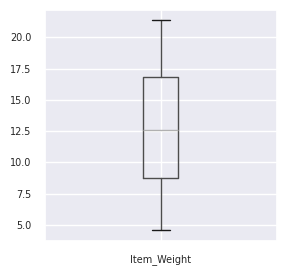

<Axes: >

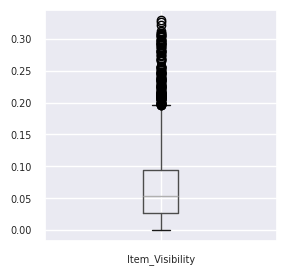

<Axes: >

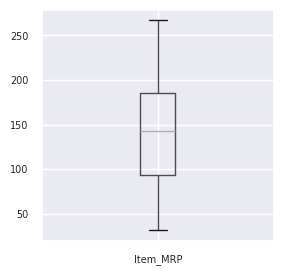

<Axes: >

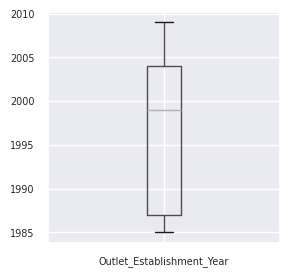

<Axes: >

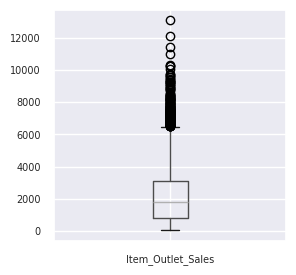

In [17]:
# Plotting boxplot to check for outliers in different numerical variables. Plotting each boxplot separately as this allows 
# for clear reading of the charts.

for i in list(numerical_vars.columns):
    pd.DataFrame(numerical_vars[i]).boxplot(figsize=(3,3), fontsize=7)
    plt.show()

Item_visibility and Item_outlet_Sales variables have outliers. We the need a strategy to handle outliers in the 
"Item_visibility" feature. "Item_Outlet_Sales" being the response variable we will leavel as it is.

#### Performing data transformations & devloping a crude base model

In [18]:
# Create a copy of train.csv
train_ = train.copy()

In [19]:
# Fill NaNs with average Item_Weight of all items
train_["Item_Weight"].fillna(train_["Item_Weight"].mean(), inplace=True)

In [20]:
# Fill Null values for "Outlet_Size" based on approach identified as earlier
train_.loc[train_["Outlet_Size"].isna(), "Outlet_Size"] = np.array(["Small" if i in ["Grocery Store", "Supermarket Type1"] else "Medium" for i in train_.loc[train_["Outlet_Size"].isna(), "Outlet_Type"]])

In [21]:
# Confirm there are no Null values in the dataset now
train_.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
# Handling data inconsistencies in "Item_Fat_Content"
train_["Item_Fat_Content"].replace(["LF", "Low FAT", "lf", "low fat", "Low fat"], "Low Fat", inplace=True)
train_["Item_Fat_Content"].replace(["reg", "regular"], "Regular", inplace=True)

In [23]:
# Confirm data inconsistencies are handles as expected
train_["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [24]:
# OneHotEncoding categorical variables
ct = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]), remainder='passthrough')
transformed = ct.fit_transform(train_)

# Below lines of code are optional. These lines will just drop 'Onehotencoder_' text from encoded column names
cols = [i[15:] if bool(re.search('onehotencoder_',i)) is True else i[11:] for i in list(ct.get_feature_names_out())]
train_= pd.DataFrame(transformed, columns = cols)

In [25]:
# Confirm OHE is performed and new columns are generated
train_.shape
train_.columns

(8523, 35)

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Identifier', 'Item_Weight',
       'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
# Droping 'Item_Identifier' and 'Outlet_Identifier' as these will not have impact on product sales
train_.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [27]:
# Confirm two columns are deleted 
train_.shape

(8523, 33)

In [28]:
# Scaling various features and check first 5 records in the scaled dataframe
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
train_ = mm.fit_transform(train_)
train_ = pd.DataFrame(train_, columns=mm.get_feature_names_out())
train_.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.282525,0.048866,0.927507,0.583333,0.283587
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.081274,0.058705,0.072068,1.000000,0.031419
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.770765,0.051037,0.468288,0.583333,0.158115
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.871986,0.000000,0.640093,0.541667,0.053555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.260494,0.000000,0.095805,0.083333,0.073651


In [29]:
# Create features (X) and target (y) dataframes

X = train_.drop("Item_Outlet_Sales", axis=1)
y = train_["Item_Outlet_Sales"]

In [30]:
# Do train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, shuffle=True)

In [31]:
# Instantiating and fitting a base model
le = LinearRegression()
le.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predicting target/response variable values based on test split
y_pred = le.predict(X_test)

In [33]:
# Base model evaluation using RMSE
RMSE = math.sqrt(metrics.mean_squared_error(y_pred, y_test))
RMSE

0.0870903369287937

In [34]:
# Base model evaluation using r2
metrics.r2_score(y_test, y_pred)

0.5548517814366052

In [35]:
# Checking 'Coefficient's of Determination" (Or simply Coefficients) for different features 
features = X_test.columns
result = pd.Series(le.coef_, index = features).sort_values(ascending= False)
result

Item_MRP                           2.871399e-01
Outlet_Establishment_Year          7.657242e-02
Item_Visibility                   -5.722046e-05
Item_Weight                       -5.142212e-03
Outlet_Type_Supermarket Type3     -4.710027e+10
Outlet_Type_Supermarket Type1     -4.710027e+10
Outlet_Type_Supermarket Type2     -4.710027e+10
Outlet_Type_Grocery Store         -4.710027e+10
Outlet_Location_Type_Tier 1       -2.394025e+11
Outlet_Location_Type_Tier 2       -2.394025e+11
Outlet_Location_Type_Tier 3       -2.394025e+11
Item_Type_Starchy Foods           -2.965113e+11
Item_Type_Breads                  -2.965113e+11
Item_Type_Seafood                 -2.965113e+11
Item_Type_Fruits and Vegetables   -2.965113e+11
Item_Type_Soft Drinks             -2.965113e+11
Item_Type_Health and Hygiene      -2.965113e+11
Item_Type_Canned                  -2.965113e+11
Item_Type_Snack Foods             -2.965113e+11
Item_Type_Baking Goods            -2.965113e+11
Item_Type_Dairy                   -2.965

Looking at the 'Coefficients' we can conclude that "Item_Visibility" and "Item_weight" features have very week (closer to zero)
coefficients. Hence these are not much useful while predicting the "Item_Outlet_Sales". Therefore, we can be drop these from the model.

In [36]:
X_test.drop(["Item_Visibility", "Item_Weight"], axis=1, inplace=True)

In [37]:
X_train.drop(["Item_Visibility", "Item_Weight"], axis=1, inplace=True)

In [38]:
# Fitting the base model again
le.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = le.predict(X_test)

In [40]:
# Evaluating new model with r2 metrics
metrics.r2_score(y_test, y_pred)

0.5546379760547893

The revised r2 score for the model is practically the same as with "Item_Visibility" and "Item_Weight" features.
For demonstration sake, we will retain both of these features while creating and fine-tuning the predictive models

### STEP 3 - Data cleaning and wrangling

Our pre-processing approach will be to create a custom tranformers which will handle identified data issues such as missing values, outliers, data inconsistencies and so on. These will be chained into a pipeline to define a sequence of transformations to be applied to the dataset. This approach will make it easy to apply the same set of transformations in exact same sequence to any new data (e.g the test data set).

In [41]:
# Transformer to convert Item_Identifier column into a categorical variable with 3 levels 

class ItemIdentifierTransfomer (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data["Item_Super_Category"] = data["Item_Identifier"].apply(lambda x: x[:2])
        data["Item_Super_Category"] = data["Item_Super_Category"].map({"FD": "Food",
                                                                "NC": "Non-Consumable",
                                                                "DR": "Drinks"})
        return data       

In [42]:
# Transformer to treat missing values in "Item_Weight"

class ItemWeightTransformer (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        mean_item_weight_by_identifier = data.groupby("Item_Identifier")["Item_Weight"].mean()
        data.loc[data["Item_Weight"].isna(), "Item_Weight"] = mean_item_weight_by_identifier[data[data["Item_Weight"].isna()]["Item_Identifier"]].values
        data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)
        return data

In [43]:
# Transformer to handle inconsistent values for "Item_Fat_Content"

class ItemFatContentTransformer (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["lf", "low fat", "LF", "Low fat", "low Fat"], "Low Fat")
        data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["reg", "REG", "regular", "REGULAR"], "Regular")
        return data

In [44]:
# Transformer to handle missing values in "Outlet_Size"

class OutletSizeTransformer (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0], inplace=True)
        return data

In [45]:
# Transformer to convert "Outlet_Establishment_Year" to "Outlet_Age"

class OutletAgeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        data = X.copy()
        data["Outlet_Age"] = datetime.now().year - data["Outlet_Establishment_Year"]
        return data

In [46]:
# Transformer to handle outliers in "Item_Visibility" and convert this into a categorical column "Item_Visibility_Bins"

class ItemVisibilityTransformer (BaseEstimator, TransformerMixin):
    def fit (self, X, y=None):
        return self
    def transform (self, X, y=None):
        data = X.copy()
        Q1, Q3 = data["Item_Visibility"].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        data = data.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')
        #X["Item_Visibility_Bins"] = pd.cut(X["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ["Low_Viz", "Viz", "High_Viz"])
        #X["Item_Visibility_Bins"].fillna("Low_Viz", inplace=True)
        return data

In [47]:
# Transformer to drop irrelevant columns from the dataset

class SelectColDroperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, col_names):
        self.col_names = col_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        data = X.copy()
        data.drop(self.col_names, axis=1, inplace=True)
        return data

In [48]:
# Creating the pipeline of data cleaning transformations

preprocessors = Pipeline(steps=[("Item_Identifier_Transformer", ItemIdentifierTransfomer()),
                                ("Item_Weight_Transformer", ItemWeightTransformer()),
                                ("Item_Fat_Content_Transformer", ItemFatContentTransformer()),
                                ("Outlet_Size_Transformer", OutletSizeTransformer()),
                                ("Outlet_Age_Transformer", OutletAgeTransformer()),
                                ("Item_Visibility_Transformer", ItemVisibilityTransformer()),
                                ("Select_Column_Droper_Transformer", SelectColDroperTransformer(["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"])),
                                ])

In [49]:
# Fit the data cleaning pipeline - preprocessors

data = preprocessors.fit_transform(train)

In [50]:
# Confirming the desired transformations did happen

data.shape
data.isna().sum()
data.columns

(8379, 11)

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Super_Category     0
Outlet_Age              0
dtype: int64

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Super_Category', 'Outlet_Age'],
      dtype='object')

In [51]:
# Splitting cleaned data into separate feature_set and target dataframes

X = data.drop(["Item_Outlet_Sales"], axis=1)
y = data["Item_Outlet_Sales"]

# Confirming the split happned
X.shape
y.shape

(8379, 10)

(8379,)

In [52]:
# Further creating train and test splits for model development

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

# Confirming the train and test splits are created correctly
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(5865, 10)

(2514, 10)

(5865,)

(2514,)

In [53]:
# Instantiating column_transformer to transfrom categorial features using OneHotEncoder

categorical = X.select_dtypes(include='object').columns
encoder = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical), remainder='passthrough')

In [54]:
# Creating a list of 8 base models to be built for comparision

regressors = [("LinR", LinearRegression()),
              ("ElasticNet", ElasticNet(random_state=81)),
              ("Lasso", Lasso(random_state=81)),
              ("SVR", SVR()),
              ("KNR", KNeighborsRegressor()),
              ("DTR", DecisionTreeRegressor(random_state=81)),
              ("RFR", RandomForestRegressor(random_state=81)),
              ("XGBR", XGBRegressor())]

In [55]:
# Defining a function for quick evaluation of different regressors uing the sklearn pipeline


def quick_eval(X_train, y_train, X_test, y_test):
    
    models = []
    names = []
        
    for name, regressor in regressors:
        names.append(name)
        pipe = Pipeline(steps=[("encoder", encoder), ('scaler', MaxAbsScaler()), (name, regressor)])
        model = pipe.fit(X_train, y_train)
        models.append(model)
        train_score = pipe.score(X_train, y_train)
        test_score = pipe.score(X_test, y_test)
        
        print(name,":  The training score is:  ",round(train_score, 3))
        print(name,":  The test score is:  ",round(test_score, 3))
        
        result = dict(zip(names, models))
                          
    return result

In [56]:
# Calling the quick_eval() function to generate results of differents models

models = quick_eval(X_train, y_train, X_test, y_test)

LinR :  The training score is:   0.555
LinR :  The test score is:   0.567
ElasticNet :  The training score is:   0.145
ElasticNet :  The test score is:   0.144
Lasso :  The training score is:   0.553
Lasso :  The test score is:   0.567


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0265479120>
Traceback (most recent call last):
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


SVR :  The training score is:   -0.017
SVR :  The test score is:   -0.023


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f026547b910>
Traceback (most recent call last):
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vgautam/yes/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


KNR :  The training score is:   0.631
KNR :  The test score is:   0.467
DTR :  The training score is:   1.0
DTR :  The test score is:   0.169
RFR :  The training score is:   0.936
RFR :  The test score is:   0.561
XGBR :  The training score is:   0.879
XGBR :  The test score is:   0.507


Clearly "LinR" has best training and test scores. Other models with reasonable scores are Lasso, KNR and XGBR.
ElasticNet has both poor training and test scores
DTR and RFR are cases of overfitted models as they perform well on training dataset, however perform poorly on the test dataset.
SVR appears misearable model as the score is negative

NOTE: models is a list of pipelines. Each pipeline represent one model i.e. LinR, ElasticNet, Lasso and so on. We can access individual models the same way as we access list elements. Further we can access individual steps in the pipeline objects using named_steps e.g. we can access LinR coefficients as demonstrated below

In [57]:
# Predicing y values using LinR model to check for RMSE
y_pred = models['LinR'].predict(X_test)

RMSE = math.sqrt(metrics.mean_squared_error(y_pred, y_test))
RMSE

# Below line helps access the coefficients from the LinR Model
coefficients = pd.Series(models['LinR']['LinR'].coef_, index= models['LinR'][:-1].get_feature_names_out()).sort_values(ascending=False)
coefficients

1140.769017097924

remainder__Item_MRP                                  4203.529088
onehotencoder__Outlet_Type_Supermarket Type3         2312.001646
onehotencoder__Outlet_Size_High                       734.330604
onehotencoder__Outlet_Location_Type_Tier 1            292.733806
onehotencoder__Item_Type_Seafood                      159.476945
onehotencoder__Item_Type_Starchy Foods                114.245305
onehotencoder__Item_Type_Breakfast                     84.285101
onehotencoder__Item_Super_Category_Drinks              43.231537
onehotencoder__Item_Type_Breads                        42.780507
onehotencoder__Item_Type_Fruits and Vegetables         40.971631
onehotencoder__Item_Type_Others                        36.759040
onehotencoder__Outlet_Location_Type_Tier 2             32.366697
onehotencoder__Item_Fat_Content_Regular                 8.619970
onehotencoder__Item_Type_Canned                         8.304151
onehotencoder__Item_Type_Snack Foods                   -7.865340
onehotencoder__Item_Fat_C

In [58]:
# Predicing y values using Lasso model to check for RMSE
y_pred = models['Lasso'].predict(X_test)

RMSE = math.sqrt(metrics.mean_squared_error(y_pred, y_test))
RMSE

1140.134032874625

In [59]:
# Predicing y values using XGBR model to check for RMSE
y_pred = models['XGBR'].predict(X_test)

RMSE = math.sqrt(metrics.mean_squared_error(y_pred, y_test))
RMSE

1216.4425437129603

NOW, let's take these three models for cross-validation and parameter optimization to see if we can improve the RMSE or r2 score

In [60]:
# Performing K-Fold cross-validation

n_splits = 7
model_score = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=81)
scoring = ['r2', 'neg_mean_squared_error']

for name in models:
    if name in ["LinR", "Lasso", "XGBR"]:
        
        # scores = cross_val_score(models[name], X_train, y_train, cv=kfold, scoring='r2")
        scores = cross_validate(models[name], X_train, y_train, cv=kfold, scoring=scoring)
                
        # model_score.append((name, scores, scores.mean(), scores.std()))
        model_score.append((name, scores))
        
        print(name)
        print(scoring[0]+" score for the model:")
        print("Mean: ", round(scores["test_"+scoring[0]].mean(), 4))
        print("Standard Deviation: ", round(scores["test_"+scoring[0]].std(), 4))
        
        print("RMSE score for the model:")                
        print("Mean: ", round(math.sqrt(scores["test_"+scoring[1]].mean()*(-1)), 4))
        print("Standard Deviation: ", round(math.sqrt(scores["test_"+scoring[1]].std()),4))
                        
        # print("The scores of {} cross-validations are:\n{}".format(n_splits, scores))
        # print("Mean Score: {}".format(round(scores.mean(), 3)))
        # print("Score Standard Deviation: {}".format(round(scores.std(), 3)))
        print("\n")
        
    else:
        continue        
        

LinR
r2 score for the model:
Mean:  0.5504
Standard Deviation:  0.0283
RMSE score for the model:
Mean:  1133.7258
Standard Deviation:  329.936


Lasso
r2 score for the model:
Mean:  0.5501
Standard Deviation:  0.0282
RMSE score for the model:
Mean:  1134.1281
Standard Deviation:  330.4145


XGBR
r2 score for the model:
Mean:  0.5028
Standard Deviation:  0.0379
RMSE score for the model:
Mean:  1191.0768
Standard Deviation:  325.6443




From the cross-validation scores, it is clear Linear Regression and Lasso are nearly same while XGBR is slightly poor in terms of mean RMSE
Let's now see if we can fine-tune or optimize these models especially Lasso

In [61]:
# First let's see the Hyper Params available for the three models
import inspect

for name in models:
    if name in ["LinR", "Lasso", "XGBR"]:
        print(name)
        models[name][name]._get_param_names()  # This only returns the names of the parameters
        
        print("\n")
        models[name][name].get_params()  # This returns the names of the parameters along with the current values
        
        print("\n")
        inspect.signature(models[name][name].__init__)  # This also returns the parameter names and default values. Can
        # return for uninstantiated models as well
        
        print("\n")
        inspect.getfullargspec(models[name][name].__init__).args  # This returns only the arguments (excluding named keyword
        # arguments/ parameter)

LinR


['copy_X', 'fit_intercept', 'n_jobs', 'positive']

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

<Signature (*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)>

['self']

Lasso


['alpha',
 'copy_X',
 'fit_intercept',
 'max_iter',
 'positive',
 'precompute',
 'random_state',
 'selection',
 'tol',
 'warm_start']

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 81,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

<Signature (alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')>

['self', 'alpha']

XGBR


['objective']

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

<Signature (*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None>

[]

Similarly, we can check the params available for tuning specifically for the model/pipeline in question as indicated below. Note that both GridSearchCV and cross_val_score take pipeline as estimator.

In [62]:
models["Lasso"]
models["Lasso"].get_params().keys()

# Notice "Lasso_alpha" is what we want to tune here.

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Super_Category'],
      dtype='object'))])),
                ('scaler', MaxAbsScaler()), ('Lasso', Lasso(random_state=81))])

dict_keys(['memory', 'steps', 'verbose', 'encoder', 'scaler', 'Lasso', 'encoder__n_jobs', 'encoder__remainder', 'encoder__sparse_threshold', 'encoder__transformer_weights', 'encoder__transformers', 'encoder__verbose', 'encoder__verbose_feature_names_out', 'encoder__onehotencoder', 'encoder__onehotencoder__categories', 'encoder__onehotencoder__drop', 'encoder__onehotencoder__dtype', 'encoder__onehotencoder__feature_name_combiner', 'encoder__onehotencoder__handle_unknown', 'encoder__onehotencoder__max_categories', 'encoder__onehotencoder__min_frequency', 'encoder__onehotencoder__sparse', 'encoder__onehotencoder__sparse_output', 'scaler__copy', 'Lasso__alpha', 'Lasso__copy_X', 'Lasso__fit_intercept', 'Lasso__max_iter', 'Lasso__positive', 'Lasso__precompute', 'Lasso__random_state', 'Lasso__selection', 'Lasso__tol', 'Lasso__warm_start'])

#### STEPS in Hyper Paramter Tuning:
    # Identify and narrow down the pipeline we want to tune - Note here, we can tune each step of the pipeline e.g. even 
    # replace OneHotEncoder with say OrdinalEncoder or any other, similarly change MaxAbsScalar to some other or change the
    # clip range for MinMaxScalar from default (0,1) and so on. We can change the actual estimator algo and so on.
    
    # Check the Hyper Parameters available for tuning using get_params() or get_params().keys(). Narrow down and pick few 
    # Hyper Parameters to be tuned in the pipleine/ estimator
    
    # Create a list/ array of parameter values you want to try out/ check. Ideally we must check values on both sides of the
    # optimum parameter value
    
    # Create a dict of param_values you want to check/tune. Here keys will be the names of the params and values is the list
    # or array of permissible values
    
    # Pass the dict to GridSearchCV function along with pipeline/ model, CV object and appropriaate scoring metrics

In [63]:
alpha_values = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
param_grid = {'Lasso__alpha': alpha_values}
grid = GridSearchCV(estimator = models['Lasso'], param_grid = param_grid, scoring='r2', cv=kfold )
grid_result = grid.fit(X, y)

In [64]:
# We can check all the results of GridSearchCV using the method cv_results_ on GridSearchCV results (here grid_result)

cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.321404,0.034522,0.008330,0.000981,0.5,{'Lasso__alpha': 0.5},0.557858,0.575192,0.553295,0.576817,0.548895,0.531230,0.540368,0.554808,0.015634,12
1,0.088749,0.020869,0.009153,0.001128,1.0,{'Lasso__alpha': 1.0},0.558000,0.575028,0.553908,0.576747,0.549172,0.531070,0.540455,0.554911,0.015595,11
2,0.058128,0.004846,0.007974,0.000996,1.5,{'Lasso__alpha': 1.5},0.558260,0.575063,0.554729,0.576947,0.549676,0.531404,0.540644,0.555246,0.015518,10
3,0.055589,0.005303,0.008844,0.000746,2.0,{'Lasso__alpha': 2.0},0.558418,0.575030,0.555408,0.576924,0.550066,0.531738,0.540762,0.555478,0.015401,8
4,0.046475,0.003178,0.008208,0.000496,2.5,{'Lasso__alpha': 2.5},0.558501,0.574950,0.555723,0.576816,0.550368,0.531919,0.540804,0.555583,0.015307,5
5,0.043099,0.005091,0.008076,0.001172,3.0,{'Lasso__alpha': 3.0},0.558425,0.574889,0.555867,0.576686,0.550535,0.532033,0.540796,0.555604,0.015236,3
6,0.037058,0.003670,0.007266,0.000614,3.5,{'Lasso__alpha': 3.5},0.558343,0.574800,0.555996,0.576539,0.550657,0.532175,0.540816,0.555618,0.015149,1
7,0.036803,0.002500,0.007474,0.001025,4.0,{'Lasso__alpha': 4.0},0.558223,0.574717,0.556125,0.576377,0.550656,0.532329,0.540827,0.555608,0.015064,2
8,0.035766,0.002087,0.007739,0.000719,4.5,{'Lasso__alpha': 4.5},0.558092,0.574624,0.556255,0.576215,0.550632,0.532472,0.540807,0.555585,0.014985,4
9,0.039344,0.003668,0.008641,0.000619,5.0,{'Lasso__alpha': 5.0},0.557954,0.574522,0.556398,0.576059,0.550586,0.532605,0.540744,0.555553,0.014916,6


We can see, there is lot of other information related to the time elapsed in execution etc. which at the moment is not required. Therefore we can either slice appropriate colums of interest and inspect. Usually mean_test_score, std_test_score, rank_test_score and params are important. Notice params is basically all unique combinations of the params to be checked

In [65]:
# We can visualise the results the way we want. One way is as below:

print("Best: %f using %s" % (grid_result.best_score_,\
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.555618 using {'Lasso__alpha': 3.5}
0.554808 (0.015634) with: {'Lasso__alpha': 0.5}
0.554911 (0.015595) with: {'Lasso__alpha': 1.0}
0.555246 (0.015518) with: {'Lasso__alpha': 1.5}
0.555478 (0.015401) with: {'Lasso__alpha': 2.0}
0.555583 (0.015307) with: {'Lasso__alpha': 2.5}
0.555604 (0.015236) with: {'Lasso__alpha': 3.0}
0.555618 (0.015149) with: {'Lasso__alpha': 3.5}
0.555608 (0.015064) with: {'Lasso__alpha': 4.0}
0.555585 (0.014985) with: {'Lasso__alpha': 4.5}
0.555553 (0.014916) with: {'Lasso__alpha': 5.0}
0.555502 (0.014852) with: {'Lasso__alpha': 5.5}
0.555443 (0.014788) with: {'Lasso__alpha': 6.0}


##### The best hyper parameters have to be used to re-fit a final model on the full training set. Then we will serialize the model and use it to predict response variable from the held out test data that was not used for hyper parameter tuning.

In [66]:
final_lasso_model = grid_result.best_estimator_
final_lasso_model

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Super_Category'],
      dtype='object'))])),
                ('scaler', MaxAbsScaler()),
                ('Lasso', Lasso(alpha=3.5, random_state=81))])

In [67]:
final_lasso_model.fit(X,y)  # Training the final lasso model on complete training data 

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Super_Category'],
      dtype='object'))])),
                ('scaler', MaxAbsScaler()),
                ('Lasso', Lasso(alpha=3.5, random_state=81))])

In [68]:
# Checking what is the r2 and RMSE for the final model based on entire training dataset

y_pred = final_lasso_model.predict(X)

r2_score = metrics.r2_score(y, y_pred)
print(f"r2 value is %.3f" % (r2_score))

RMSE = math.sqrt(metrics.mean_squared_error(y, y_pred))
print(f"RMSE value is %.3f" % (RMSE))

r2 value is 0.557
RMSE value is 1133.228


NOTE that despite the hyper parameter (alpha) tuning, the value of the r2 and RMSE is not much improved. The pre-tuning values are as below. Clearly the tuning have only marginally improved the metrics.
r2 score for the model: (Mean:  0.5501; Standard Deviation:  0.0282)
RMSE score for the model: (Mean:  1134.1281; Standard Deviation:  330.4145)   
        

In [69]:
# Serializing the model for later use. First we will import the pickle module and then use the dump() function to 
# create the .pkl file. The file will be created in the current working directory

import pickle
with open('final_lasso_model.pkl', 'wb') as handle:
    pickle.dump(final_lasso_model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
handle.close()

In [70]:
# Get the current working directory. In Windows Explorer we can navigate to the current working directory and confirm the 
# file has been created

import os
os.getcwd()

'/home/vgautam/DS_ML/RetailMartProductSalesPrediction'

In [71]:
# Delete the final_lasso_model from the current python environment and check if it is indeed deleted or not

del final_lasso_model
final_lasso_model

NameError: name 'final_lasso_model' is not defined

In [72]:
# Loading the serialized model for use and do predictions

final_lasso_model = pickle.load(open('final_lasso_model.pkl', 'rb'))

In [73]:
# Confirm the final_lasso_model is indeed loaded and is availble for making predictions
final_lasso_model

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Super_Category'],
      dtype='object'))])),
                ('scaler', MaxAbsScaler()),
                ('Lasso', Lasso(alpha=3.5, random_state=81))])

As a final step, let's use this model to make predictions on the test data file which is completely unseen by the model

In [74]:
# First fit_transform the data using preprocessors (pipeline of custom transformers) to prepare data 
data = preprocessors.fit_transform(test)

In [75]:
# Confirming the data is indeed transformed as required by the model
data.shape
data.columns

(5568, 10)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Super_Category', 'Outlet_Age'],
      dtype='object')

In [76]:
# Making the predictions based on the test data 

y_pred = final_lasso_model.predict(data)

Note that here we can't check the accuracy/ performance of the model now. The true value of y is unknown. The goal or aim was simply to make the predictions for business use/ purposes

In [77]:
# Check the predicted values as below. This only shows the first 5 values
y_pred[:5]

array([1776.55294441, 1493.70842492, 1930.8978288 , 2515.58310064,
       5148.85934233])

#### ----------------------------------------------------------------- End of Project --------------------------------------------------------------------------